#### Import Packages

In [1]:
import json
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import preprocessing
import numpy as np

#### Read Data

In [3]:
company_df = pd.read_csv('company_for_priceindex.xls')

In [4]:
company_data_monthly = pd.read_csv('company_financial_data_41.csv')

#### Create the first one

##### Get the financial %change per company by day

In [5]:
financial_indicators = company_data_monthly.sort_values('yyyy-mm-dd')
for comp in company_data_monthly.columns.tolist()[1:]:
    financial_indicators[comp + '_change'] = (financial_indicators[comp] - financial_indicators[comp].shift(1))/financial_indicators[comp].shift(1)
financial_indicators

yyyy-mm-dd     WMT     CLX     JNJ      PG    ROKU    NFLX   GRUB  \
99  2019-11-21  119.86  145.02  136.44  120.34  155.91  311.69  41.74   
98  2019-11-22  119.36  146.26  138.07  120.29  158.75  310.48  42.72   
97  2019-11-25  118.92  145.25  137.18  120.51  158.08  315.55  42.67   
96  2019-11-26  119.19  148.19  137.17  122.26  164.28  312.49  42.34   
95  2019-11-27  118.76  148.95  137.75  121.76  161.64  315.93  43.24   
..         ...     ...     ...     ...     ...     ...     ...    ...   
4   2020-04-09  121.80  184.21  141.23  114.66   92.45  370.72  45.09   
3   2020-04-13  125.30  185.47  139.77  115.95   96.56  396.72  39.68   
2   2020-04-14  129.00  194.37  146.03  120.96  106.53  413.55  41.80   
1   2020-04-15  128.76  195.64  147.66  121.22  113.00  426.75  40.35   
0   2020-04-16  132.33  196.49  149.67  121.50  128.00  439.17  40.30   

       AMZN    CPB  ...  HLT_change  MAR_change  EXPE_change  CVS_change  \
99  1734.71  46.84  ...         NaN         NaN          NaN         NaN   
98  1745.72  46.83  ...    0.021599    0.024590     0.020380    0.004937   
97  1773.84  46.80  ...    0.018475    0.012697     0.018628    0.016864   
96  1796.94  47.10  ...    0.021632    0.015220     0.008839   -0.021416   
95  1818.51  47.06  ...    0.009970    0.008995     0.022256    0.001334   
..      ...    ...  ...         ...         ...          ...         ...   
4   2042.76  47.75  ...   -0.023398   -0.014783     0.030884    0.017842   
3   2168.87  48.50  ...   -0.026443   -0.039602    -0.058154   -0.024971   
2   2283.32  50.07  ...    0.050570    0.058778     0.047457    0.044098   
1   2307.68  50.50  ...   -0.002000   -0.023585    -0.016564   -0.016244   
0   2408.19  51.11  ...    0.004007   -0.004212    -0.038639    0.033025   

    ANTM_change  HUM_change  UNH_change  DFS_change  BAC_change  AXP_change  
99          NaN         NaN         NaN         NaN         NaN         NaN  
98    -0.006469   -0.000680    0.001049    0.011457    0.010353    0.002189  
97     0.007059    0.019454    0.021059    0.015619    0.008740    0.012935  
96    -0.022628   -0.007917   -0.004493   -0.005283   -0.003585   -0.006716  
95     0.007694   -0.000438   -0.002594    0.004603    0.002099    0.004508  
..          ...         ...         ...         ...         ...         ...  
4     -0.018460    0.013758   -0.013815    0.053466    0.060128    0.029757  
3     -0.007960    0.018602   -0.002347   -0.077276   -0.037812   -0.047353  
2      0.047728    0.011342    0.026527   -0.017966   -0.007943   -0.021477  
1     -0.006111    0.003776    0.041331   -0.071770   -0.064897   -0.052042  
0      0.085320    0.067234    0.059465   -0.039115   -0.034700   -0.029120  

[100 rows x 81 columns]

##### Calculate the %change by company / % change of DJI per day

In [6]:
financial_indicators_DJI = financial_indicators[['yyyy-mm-dd']]
for comp in [i for i in financial_indicators.columns if '_change' in i]:
    financial_indicators_DJI[comp] = financial_indicators[comp]/financial_indicators['DJI_change']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


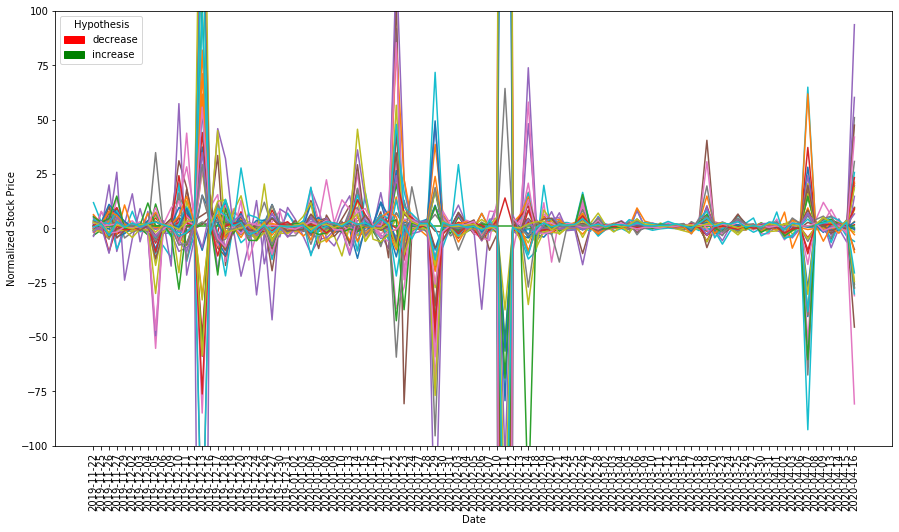

In [7]:
plt.figure(figsize=(15,8))
for c in [i for i in financial_indicators_DJI.columns if '_change' in i]:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=financial_indicators_DJI.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
#                 color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis']].values
                )
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')
plt.xticks(rotation=90)
plt.ylim([-100,100])
red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

In [8]:
financial_indicators_DJI

yyyy-mm-dd  WMT_change  CLX_change  JNJ_change  PG_change  ROKU_change  \
99  2019-11-21         NaN         NaN         NaN        NaN          NaN   
98  2019-11-22   -1.059435    2.171562    3.034062  -0.105521     4.626184   
97  2019-11-25   -0.538422   -1.008613   -0.941498   0.267130    -0.616439   
96  2019-11-26    1.154215   10.289852   -0.037058   7.382320    19.938509   
95  2019-11-27   -2.397293    3.407903    2.809709  -2.717554   -10.678537   
..         ...         ...         ...         ...        ...          ...   
4   2020-04-09   -0.026918    1.435697   -1.161848  -0.313441     4.332635   
3   2020-04-13   -2.074230   -0.493734    0.746212  -0.812108    -3.209010   
2   2020-04-14    1.235637    2.007967    1.874134   1.808037     4.320541   
1   2020-04-15    0.100037   -0.351330   -0.600187  -0.115577    -3.265678   
0   2020-04-16   19.552346    3.063888    9.599416   1.628904    93.610472   

    NFLX_change  GRUB_change  AMZN_change  CPB_change  ...  HLT_change  \
99          NaN          NaN          NaN         NaN  ...         NaN   
98    -0.985918     5.962826     1.611903   -0.054220  ...    5.485374   
97     2.385081    -0.170949     2.352716   -0.093568  ...    2.698385   
96    -4.929821    -3.931599     6.620266    3.258767  ...   10.996798   
95     7.315009    14.124861     7.976440   -0.564328  ...    6.624772   
..          ...          ...          ...         ...  ...         ...   
4     -0.088374     2.530656    -0.009632    2.824291  ...   -1.918518   
3     -5.062481     8.660703    -4.456237   -1.133767  ...    1.908716   
2      1.775171     2.235653     2.208119    1.354560  ...    2.116095   
1     -1.716275     1.865231    -0.573656   -0.461777  ...    0.107525   
0     20.523890    -0.873852    30.714631    8.518244  ...    2.826044   

    MAR_change  EXPE_change  CVS_change  ANTM_change  HUM_change  UNH_change  \
99         NaN          NaN         NaN          NaN         NaN         NaN   
98    6.245107     5.175899    1.253910    -1.642797   -0.172578    0.266319   
97    1.854549     2.720754    2.463087     1.031017    2.841382    3.075873   
96    7.737151     4.493344  -10.886955   -11.503096   -4.024835   -2.284031   
95    5.977051    14.788889    0.886704     5.112577   -0.291369   -1.723818   
..         ...          ...         ...          ...         ...         ...   
4    -1.212065     2.532244    1.462933    -1.513599    1.128057   -1.132715   
3     2.858565     4.197773    1.802491     0.574584   -1.342747    0.169438   
2     2.459560     1.985825    1.845254     1.997160    0.474607    1.109993   
1     1.268163     0.890639    0.873459     0.328582   -0.203044   -2.222366   
0    -2.969994   -27.248438   23.289263    60.167287   47.413525   41.934399   

    DFS_change  BAC_change  AXP_change  
99         NaN         NaN         NaN  
98    2.909664    2.629385    0.555822  
97    2.281358    1.276587    1.889224  
96   -2.685671   -1.822651   -3.414410  
95    3.058581    1.394745    2.995475  
..         ...         ...         ...  
4     4.383841    4.930084    2.439851  
3     5.578043    2.729373    3.418082  
2    -0.751770   -0.332378   -0.898690  
1     3.859100    3.489506    2.798309  
0   -27.583583  -24.470624  -20.535688  

[100 rows x 41 columns]

In [9]:
USO_change = []
i = company_data_monthly[['yyyy-mm-dd', 'USO', 'DJI']].sort_values('yyyy-mm-dd')
for item in range(len(i)-1):
    USO_change.append((i.loc[item+1, 'USO'] - i.loc[item, 'USO'])/i.loc[item, 'USO'])

In [10]:
DJI_change = []
i = company_data_monthly[['yyyy-mm-dd', 'USO', 'DJI']].sort_values('yyyy-mm-dd')
for item in range(len(i)-1):
    DJI_change.append((i.loc[item+1, 'DJI'] - i.loc[item, 'DJI'])/i.loc[item, 'DJI'])

##### % change by DJI and USO

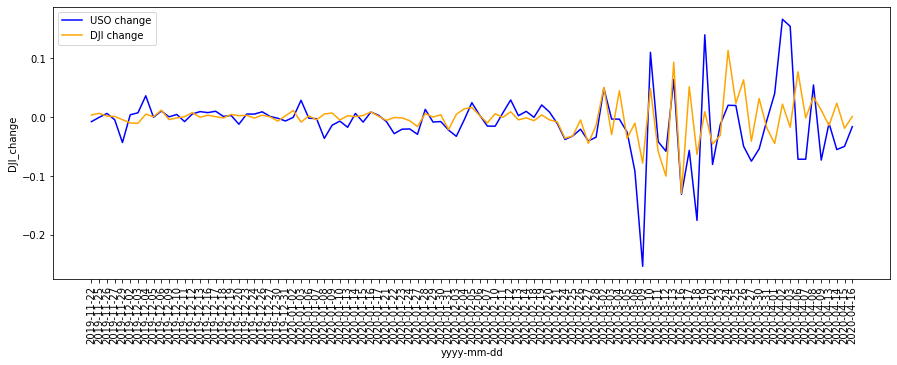

In [11]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=financial_indicators, x='yyyy-mm-dd', y='USO_change', color='blue', label='USO change')
sns.lineplot(data=financial_indicators, x='yyyy-mm-dd', y='DJI_change', color='orange', label='DJI change')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [12]:
d = pd.read_csv('company_financial_data_35.csv', index_col=False)

In [13]:
d

yyyy-mm-dd     WMT     CLX     JNJ      PG    ROKU    CHTR     VZ   PTON  \
0   2020-03-13  114.10  167.77  134.29  114.07   80.95  454.19  54.17  19.72   
1   2020-03-12  104.05  158.70  125.41  101.84   78.81  427.54  51.20  19.51   
2   2020-03-11  114.43  169.40  131.80  111.59   90.63  450.65  54.83  22.00   
3   2020-03-10  119.79  175.00  141.64  120.55   97.30  476.76  56.52  22.97   
4   2020-03-09  117.16  174.90  136.44  116.06   96.26  463.21  55.83  23.21   
..         ...     ...     ...     ...     ...     ...     ...    ...    ...   
95  2019-10-25  119.04  151.40  128.35  123.25  133.74  462.19  60.37  22.40   
96  2019-10-24  119.10  150.76  127.50  124.79  131.22  435.07  60.58  21.34   
97  2019-10-23  119.35  149.81  129.90  123.00  128.76  435.56  60.88  21.08   
98  2019-10-22  119.58  148.44  129.20  122.18  129.06  437.23  60.77  21.16   
99  2019-10-21  119.74  149.07  128.02  119.08  133.03  438.16  60.75  22.26   

     UBER  ...    DAL    UAL   PLNT   EQX    CCL    HLT     MAR    EXPE  \
0   22.60  ...  38.36  41.64  53.98  5.75  17.58  78.63   95.61   69.63   
1   22.61  ...  33.71  37.08  48.32  5.86  14.97  76.72   93.71   65.04   
2   26.24  ...  42.67  49.34  57.00  6.62  21.75  81.09  100.11   76.67   
3   28.97  ...  45.47  52.56  62.63  7.70  24.02  90.32  109.98   85.93   
4   28.17  ...  43.52  46.78  56.65  7.72  21.74  86.18  104.19   86.30   
..    ...  ...    ...    ...    ...   ...    ...    ...     ...     ...   
95  32.71  ...  54.60  91.64  61.04  6.23  44.57  97.69  126.18  137.06   
96  33.28  ...  53.79  89.81  61.11  6.11  43.90  96.91  124.30  137.14   
97  33.05  ...  53.81  89.90  60.12  6.06  44.00  95.77  123.49  138.31   
98  32.53  ...  54.65  89.71  60.46  6.05  42.55  90.73  122.05  136.65   
99  31.41  ...  54.58  90.78  60.26  6.10  43.12  92.39  123.00  136.26   

      CVS    ANTM  
0   59.64  270.34  
1   54.60  256.21  
2   61.31  281.69  
3   62.60  286.05  
4   61.30  269.82  
..    ...     ...  
95  65.10  263.07  
96  64.84  259.49  
97  65.60  263.51  
98  66.56  260.25  
99  65.70  253.07  

[100 rows x 35 columns]

In [14]:
company_data = pd.read_csv('company_financial_data_41.csv', index_col=False)

In [15]:
def normalize(x_pre, x):
    min_val = min(x_pre)
    max_val = max(x_pre)
    
    r = max_val - min_val    
    x_transformed = [(i - min_val)/r for i in x]
    return x_transformed

In [16]:
comp_notnull = company_data.loc[:, company_data.isnull().sum() < company_data.shape[0]].columns[1:]


company_data_daily_normalized = pd.DataFrame()
company_data_daily_normalized['yyyy-mm-dd'] = company_data['yyyy-mm-dd']
for company in comp_notnull:
    x = list(company_data[company].values)
    x_pre = np.array(company_data.loc[company_data['yyyy-mm-dd'] < '2020-02-01', company].values)

    company_data_daily_normalized[company] = normalize(x_pre, x)


In [17]:
company_data_daily_normalized

yyyy-mm-dd       WMT       CLX       JNJ        PG      ROKU      NFLX  \
0   2020-04-16  2.599132  3.445114  0.938298  0.197712  0.162705  2.432545   
1   2020-04-15  2.082489  3.388220  0.795745  0.151961 -0.183476  2.225683   
2   2020-04-14  2.117221  3.303213  0.680142  0.109477 -0.332795  2.005829   
3   2020-04-13  1.581766  2.707497  0.236170 -0.709150 -0.562889  1.725516   
4   2020-04-09  1.075253  2.623159  0.339716 -0.919935 -0.657743  1.292472   
..         ...       ...       ...       ...       ...       ...       ...   
95  2019-11-27  0.635311  0.263052  0.092908  0.240196  0.939072  0.379913   
96  2019-11-26  0.697540  0.212182  0.051773  0.321895  1.000000  0.322618   
97  2019-11-25  0.658466  0.015395  0.052482  0.035948  0.856912  0.373584   
98  2019-11-22  0.722142  0.082999  0.115603  0.000000  0.872375  0.289141   
99  2019-11-21  0.794501  0.000000  0.000000  0.008170  0.806831  0.309294   

        GRUB      AMZN       CPB  ...       HLT       MAR      EXPE       CVS  \
0   0.064516  2.457867  1.570934  ... -1.949461 -2.609926 -1.867896 -0.600457   
1   0.067076  2.091055  1.359862  ... -1.968329 -2.593052 -1.748080 -0.828767   
2   0.141321  2.002153  1.211073  ... -1.958895 -2.496278 -1.695853 -0.714612   
3   0.032770  1.584468  0.667820  ... -2.185984 -2.724069 -1.838710 -1.011416   
4   0.309780  1.124229  0.408304  ... -2.064016 -2.564268 -1.652842 -0.839041   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.215054  0.305828  0.169550  ...  0.491240  0.414888  0.348694  0.824201   
96  0.168971  0.227108  0.183391  ...  0.420485  0.352357  0.235535  0.812785   
97  0.185868  0.142805  0.079585  ...  0.270216  0.248139  0.190988  1.000000   
98  0.188428  0.040181  0.089965  ...  0.144205  0.162283  0.098822  0.855023   
99  0.138249  0.000000  0.093426  ...  0.000000  0.000000  0.000000  0.812785   

        ANTM       HUM       UNH       DFS       BAC       AXP  
0   0.154498  1.059598  0.918346 -3.301016 -4.060498 -1.899676  
1  -0.348799  0.446336  0.326264 -3.200156 -3.786477 -1.768069  
2  -0.312529  0.412023 -0.068929 -3.000782 -3.238434 -1.519957  
3  -0.582902  0.310114 -0.316013 -2.949961 -3.170819 -1.415318  
4  -0.537447  0.146027 -0.294097 -2.713057 -2.836299 -1.173139  
..       ...       ...       ...       ...       ...       ...  
95  0.569242  0.147059  0.290562  0.876466  0.209964  0.202805  
96  0.517193  0.150929  0.316366  0.845973  0.185053  0.173679  
97  0.673811  0.221362  0.361258  0.881157  0.227758  0.217368  
98  0.625294  0.051600  0.155179  0.778733  0.124555  0.134304  
99  0.670042  0.057534  0.144928  0.704457  0.003559  0.120280  

[100 rows x 41 columns]

In [18]:
comp_notnull = company_data.loc[:, company_data.isnull().sum() < company_data.shape[0]].columns[1:]


company_data['yyyy-mm-dd'] = pd.to_datetime(company_data['yyyy-mm-dd'])
for c in comp_notnull:
    company_data[c] = company_data[c].astype(float)

In [19]:
hypo_colors = {'increase':'green', 'decrease':'red'}

No handles with labels found to put in legend.


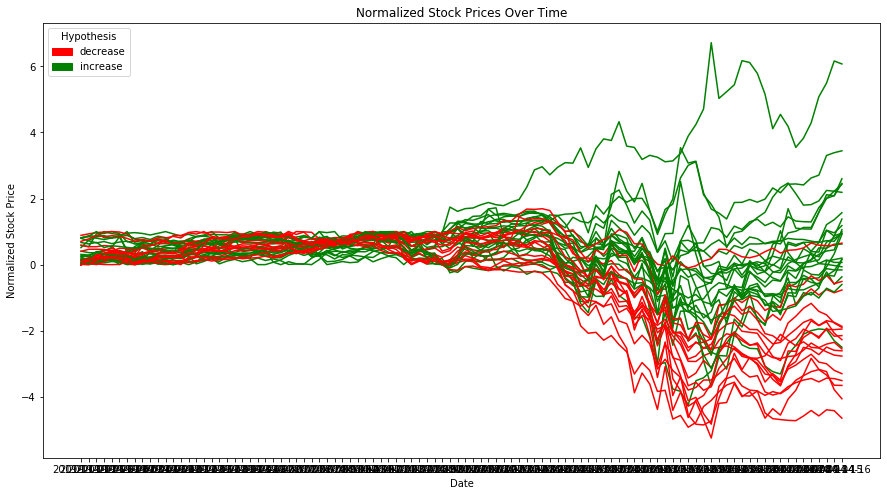

In [20]:
plt.figure(figsize=(15,8))
for c in comp_notnull:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data_daily_normalized.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
                color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis'].values[0]])
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')

plt.title('Normalized Stock Prices Over Time')
red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

min: Carnival Cruise <br>
max: Zoom

##### Interactive

In [21]:
import plotly.graph_objects as go
import plotly.express as px

In [22]:
company_data_daily_normalized_stacked = pd.DataFrame(columns=['yyyy-mm-dd','normalized_stock_price', 'company_index'])
for c in comp_notnull:
    d = company_data_daily_normalized.loc[:,['yyyy-mm-dd']+[c]]
    d.columns = ['yyyy-mm-dd','normalized_stock_price']
    d['company_index'] = c
    company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.append(d)
company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.merge(company_df, 
                                                                                    on='company_index', 
                                                                                    how='left')

In [23]:
company_data_daily_normalized_stacked.head()

yyyy-mm-dd  normalized_stock_price company_index  company hypothesis  \
0  2020-04-16                2.599132           WMT  Walmart   increase   
1  2020-04-15                2.082489           WMT  Walmart   increase   
2  2020-04-14                2.117221           WMT  Walmart   increase   
3  2020-04-13                1.581766           WMT  Walmart   increase   
4  2020-04-09                1.075253           WMT  Walmart   increase   

      group  
0  cleaning  
1  cleaning  
2  cleaning  
3  cleaning  
4  cleaning

In [24]:
company_df

company company_index hypothesis          group
0                       Walmart           WMT   increase       cleaning
1                        Clorox           CLX   increase       cleaning
2           Johnson and Johnson           JNJ   increase       cleaning
3            Proctor and Gamble            PG   increase       cleaning
4                          Roku          ROKU   increase  entertainment
5                       Netflix          NFLX   increase  entertainment
6                   GrubHub Inc          GRUB   increase        indoors
7                        Amazon          AMZN   increase        indoors
8                      Campbell           CPB   increase        indoors
9                          Zoom            ZM   increase        indoors
10                       Google         GOOGL   increase        indoors
11                    Microsoft          MSFT   increase        indoors
12                     Spectrum          CHTR   increase        indoors
13                      Verizon            VZ   increase        indoors
14          Peleton Interactive          PTON   increase        indoors
15                         Uber          UBER   increase         travel
16                         Lyft          LYFT   increase         travel
17       Sprouts Farmers Market           SFM   increase        grocery
18                      Krogers            KR   increase        grocery
19                       Costco          COST   increase        grocery
20                     AB InBev           BUD   decrease      confusion
21                 US Oil Index           USO   decrease      financial
22                    Dow Jones           DJI   decrease      financial
23                    Starbucks          SBUX   decrease        indoors
24                    McDonalds           MCD   decrease        indoors
25                        Delta           DAL   decrease         travel
26                       United           UAL   decrease         travel
27               China Airlines           TPE   decrease         travel
28           Planet Fitness Inc          PLNT   decrease        indoors
29                      Equinox           EQX   decrease        indoors
30               Carnival Corp.           CCL   decrease         travel
31             Hilton Worldwide           HLT   decrease         travel
32        Marriot International           MAR   decrease         travel
33                      Expedia          EXPE   decrease         travel
34                          CVS           CVS   increase      insurance
35                       Anthem          ANTM   increase      insurance
36                       Humana           HUM   increase      insurance
37           UnitedHealth Group           UNH   increase      insurance
38  Discover Financial Services           DFS   decrease      financial
39  Bank of America Corporation           BAC   decrease      financial
40     American Express Company           AXP   decrease      financial

In [25]:
# fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", y='normalized_stock_price', 
#               line_group='company_index', color='hypothesis',
#               hover_name="company")
# Create figure
fig = go.Figure()

for c in company_data_daily_normalized_stacked.company_index.unique():
    df = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked.company_index==c]
    x = df["yyyy-mm-dd"]
    y= df['normalized_stock_price']
    
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
#     fill='toself',
#     fillcolor='rgba(0,100,80,0.2)',
#     line_color='rgba(255,255,255,0)',
#     showlegend=False,
    name=company_df.loc[company_df.company_index==c,'company'].values[0]
    ))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    yaxis=dict(
       autorange = True,
       fixedrange= False
   ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [26]:
fig = go.Figure()

for c in company_data_daily_normalized_stacked.company_index.unique():
    df = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked.company_index==c]
    x = df["yyyy-mm-dd"]
    y= df['normalized_stock_price']
    
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
#     fill='toself',
#     fillcolor='rgba(0,100,80,0.2)',
#     line_color='rgba(255,255,255,0)',
#     showlegend=False,
    name=company_df.loc[company_df.company_index==c,'company'].values[0]
    ))
fig.show()

In [27]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", y='normalized_stock_price', 
              line_group='company_index', color='group',
              hover_name="company")
fig.show()

In [28]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", 
              y='normalized_stock_price', line_group='company_index')
fig.data[10].visible = True
# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [29]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", 
              y='normalized_stock_price', line_group='company_index')
fig.show()

No handles with labels found to put in legend.


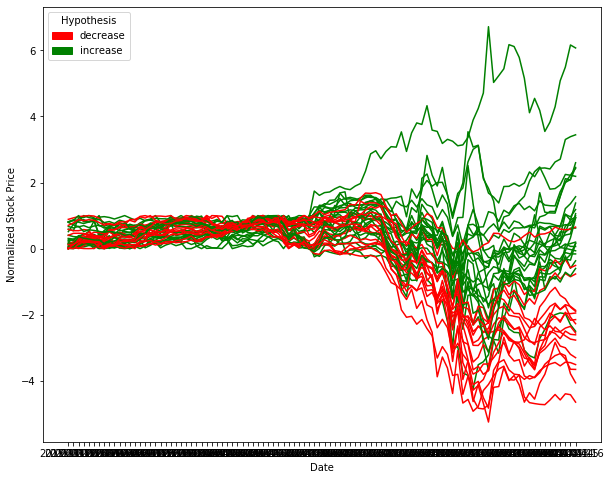

In [30]:
plt.figure(figsize=(10,8))
for c in comp_notnull:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data_daily_normalized.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
                color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis'].values[0]])
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')

red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



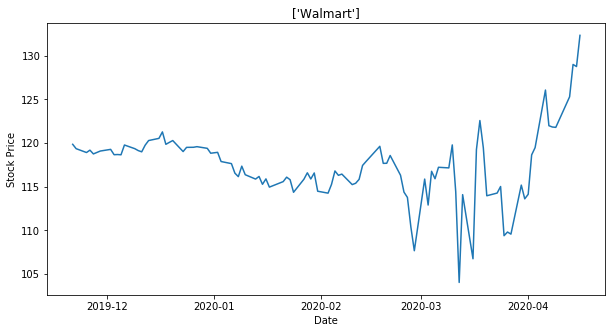

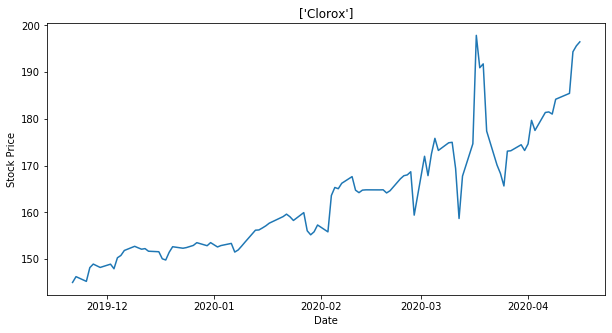

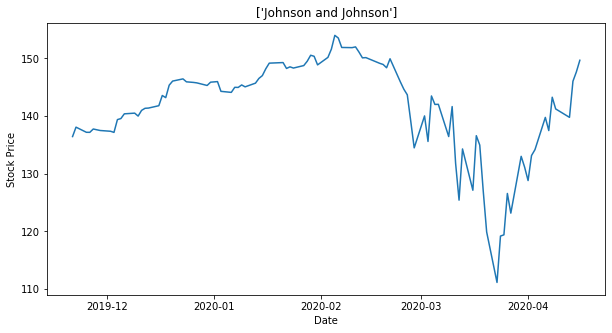

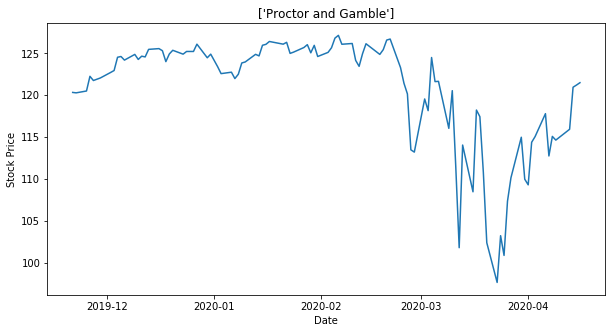

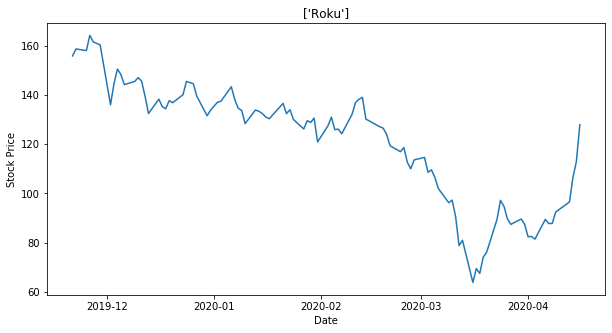

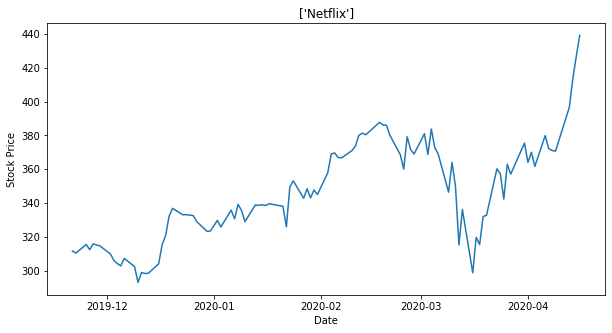

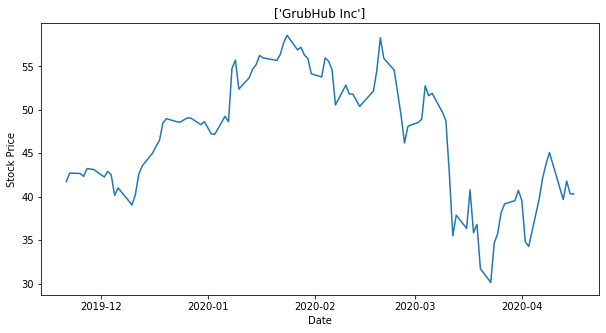

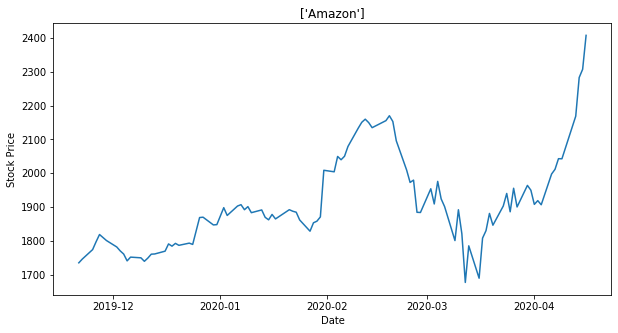

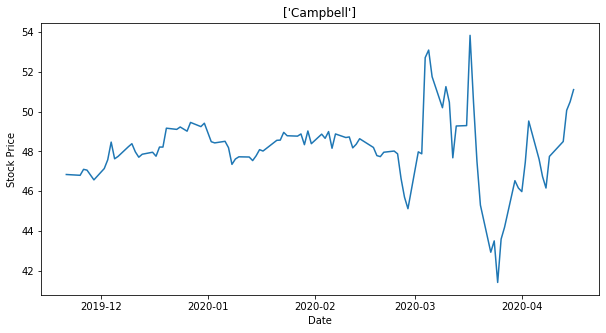

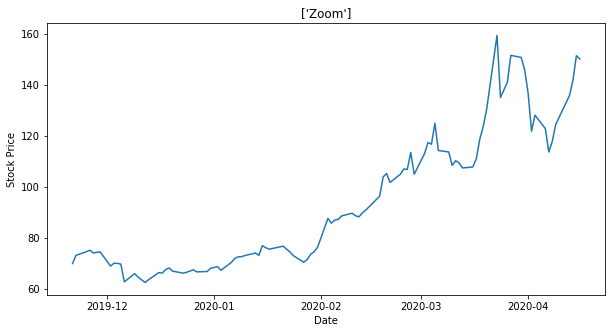

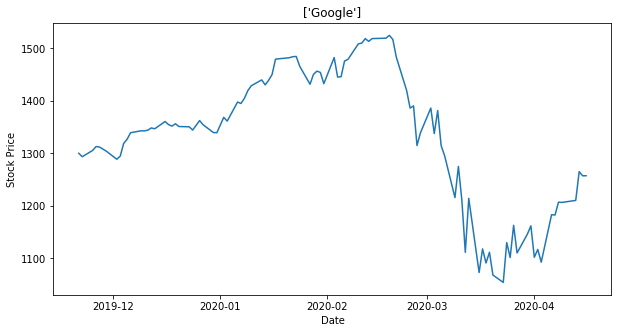

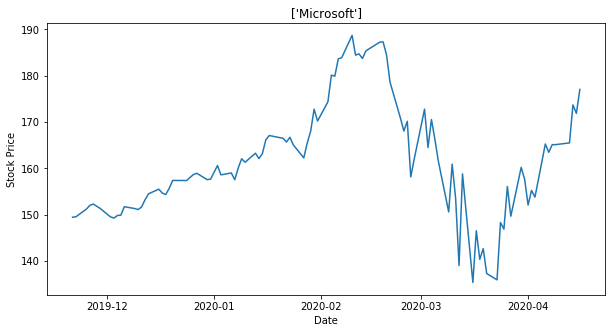

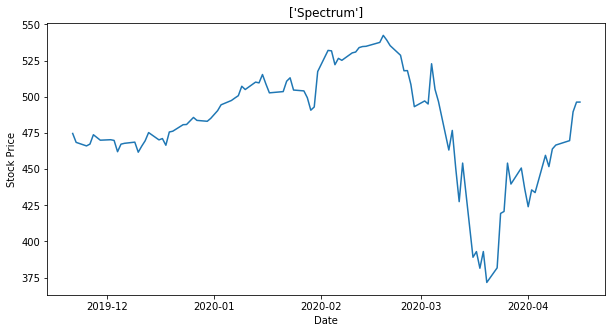

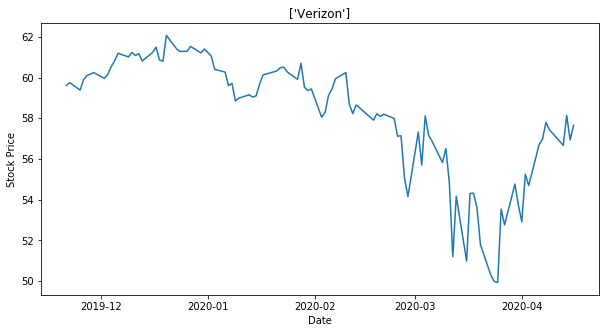

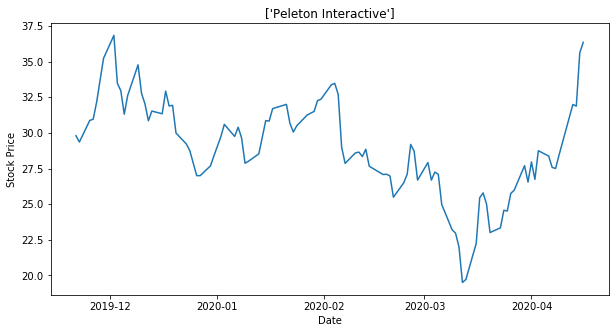

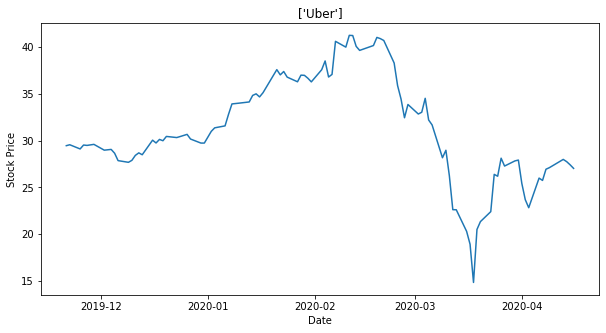

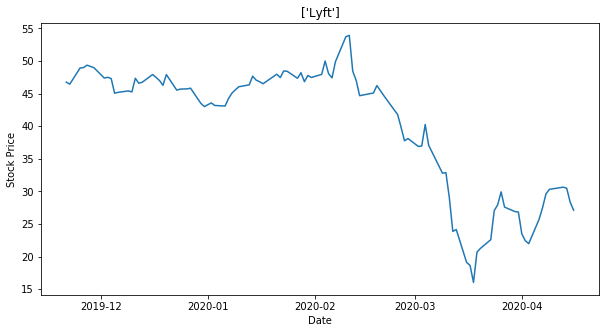

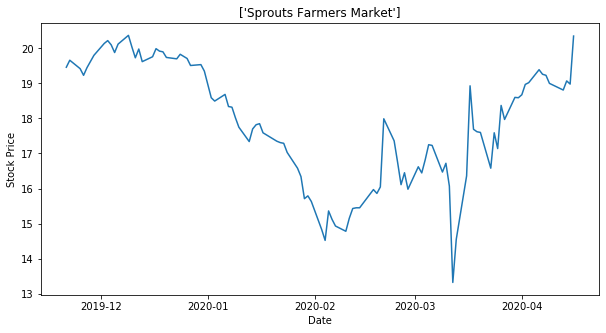

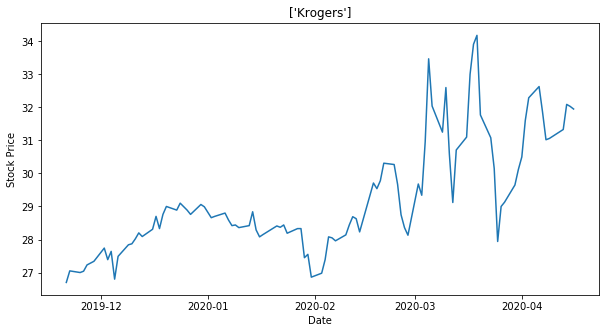

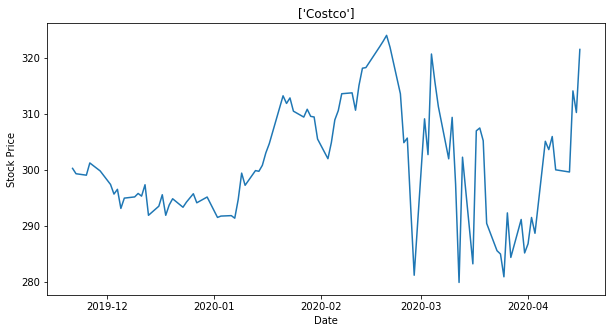

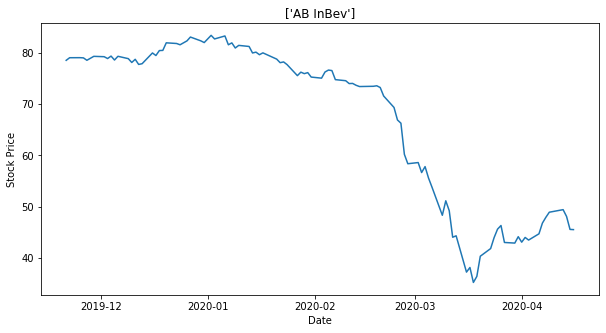

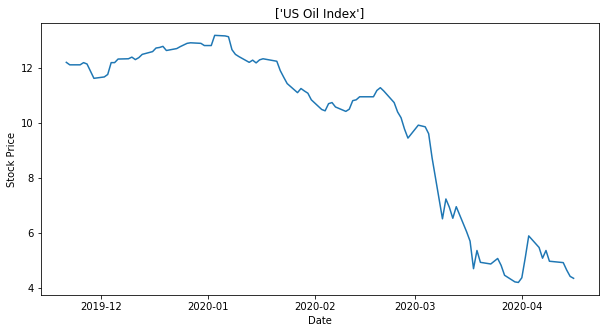

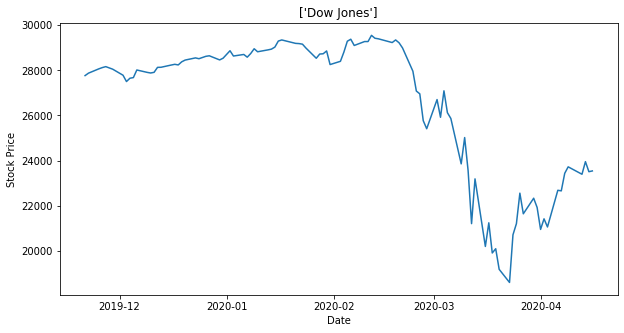

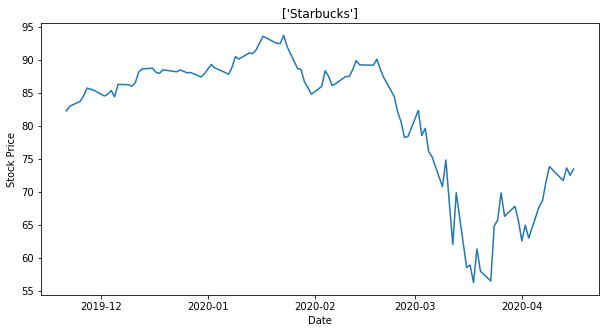

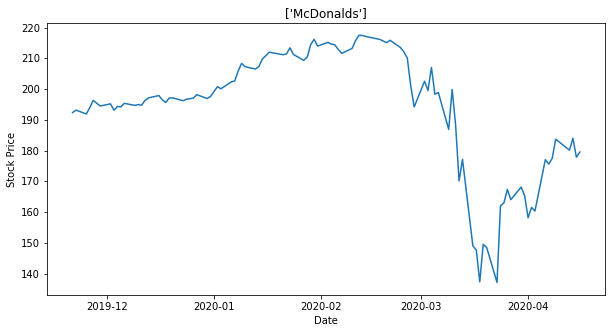

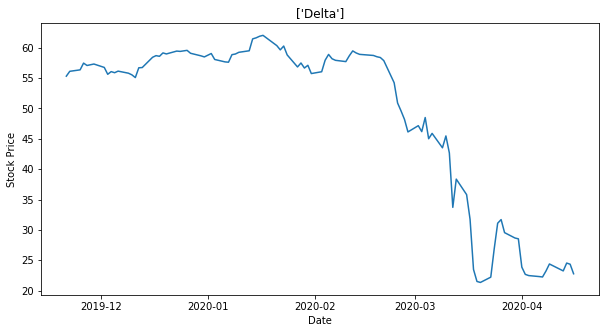

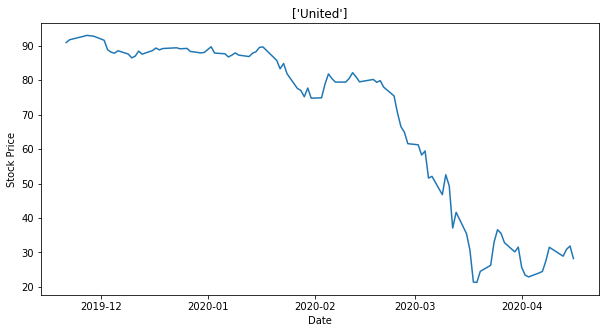

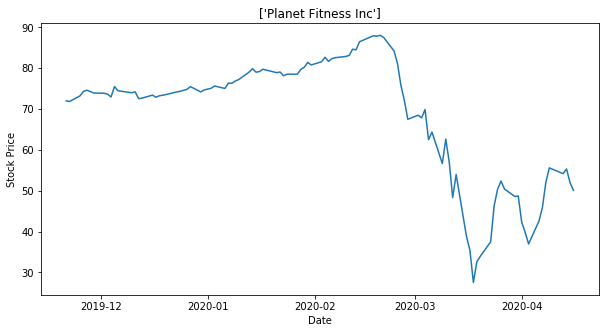

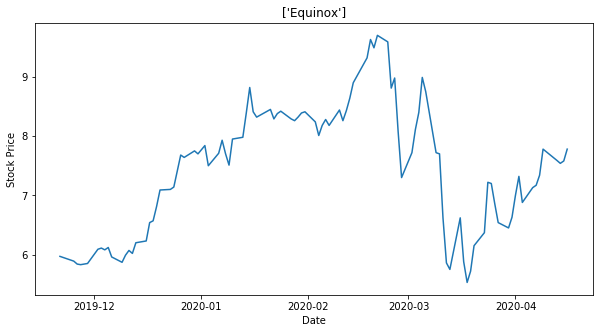

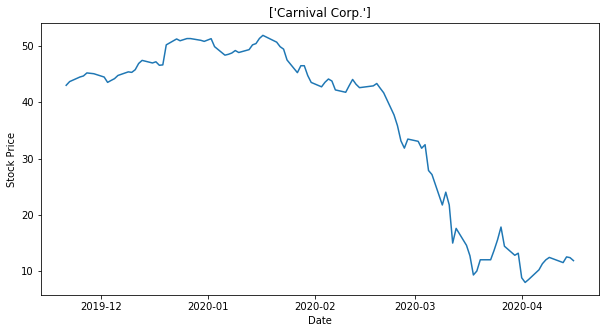

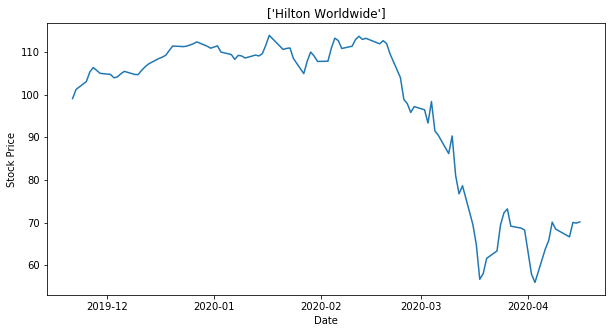

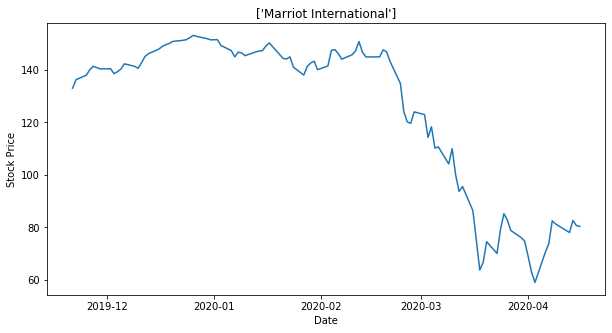

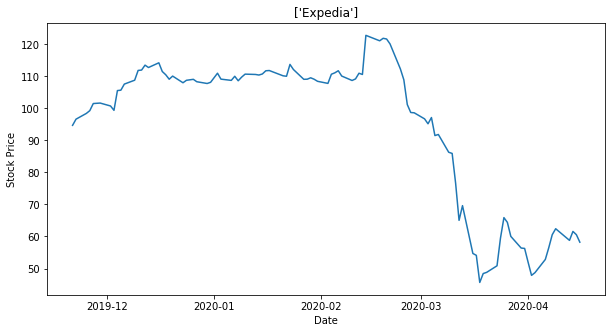

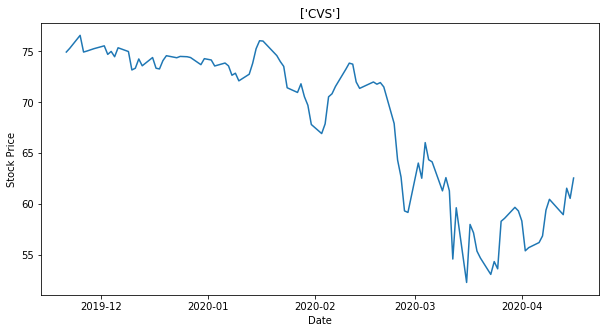

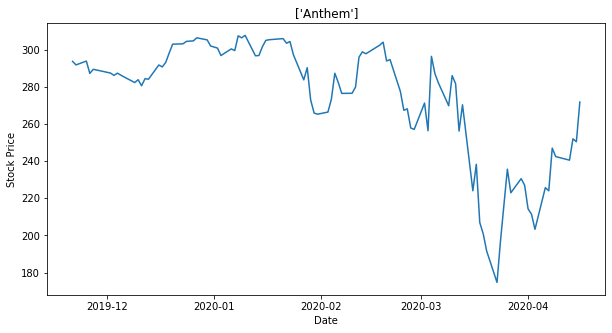

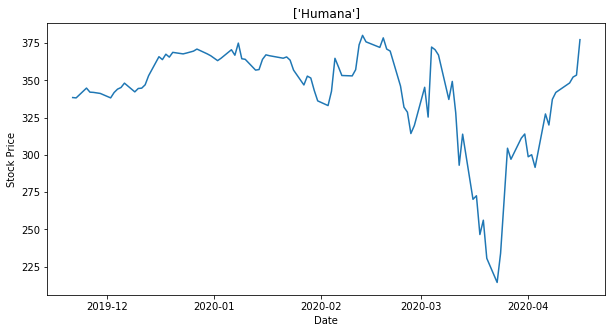

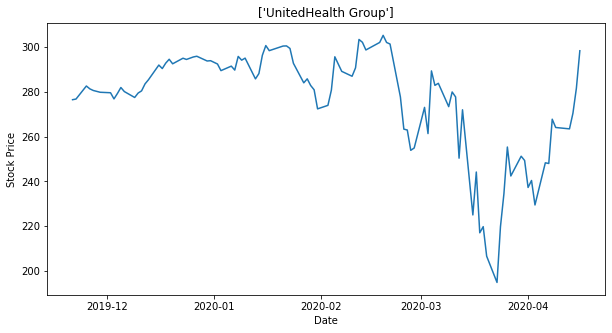

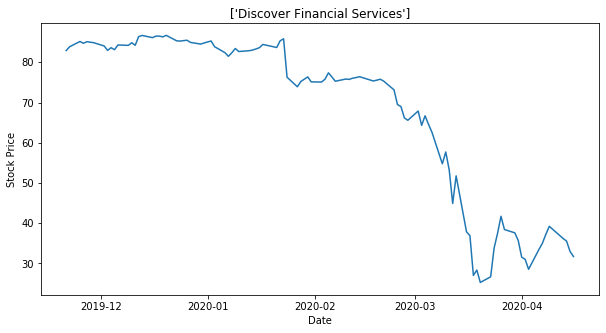

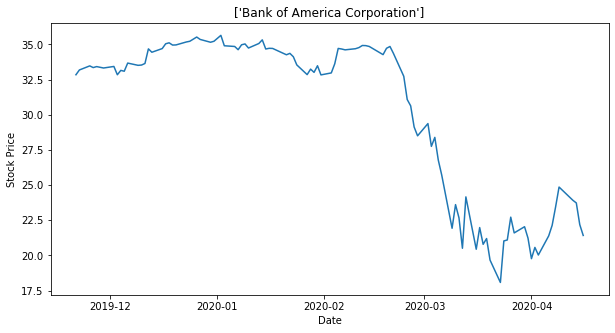

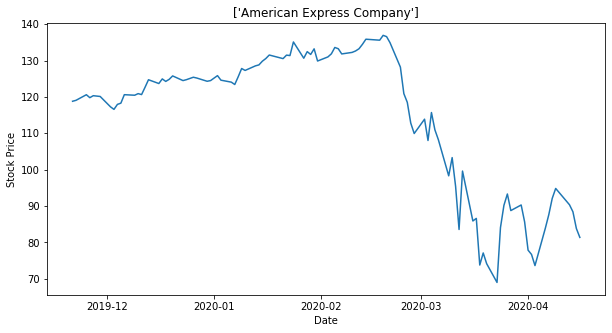

In [31]:
for c in comp_notnull:
    plt.figure(figsize=(10,5))
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data.loc[:, ['yyyy-mm-dd'] + [c]])
    plt.title(company_df.loc[company_df.company_index==c, 'company'].values)
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.show()

In [34]:
hypothesis_colors = {'increase':'green', 'decrease':'red'}

colors = ['red', 'orange', 'yellow', 'green', 'powderblue', 'blue', 'magenta', 'purple', 'black']

industry_colors = {company_df.group.unique()[i]: colors[i] for i in range(len(company_df.group.unique()))}


In [35]:
company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked['yyyy-mm-dd'] < '2020-04-01']

fig = go.Figure()
industry_plots = []
hypothesis_plots = []

for c in company_data_daily_normalized_stacked.company_index.unique():
    df = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked.company_index==c]
    x = df["yyyy-mm-dd"]
    y= df['normalized_stock_price']
    industry = company_df.loc[company_df.company_index==c,'group'].values[0]
    hypothesis = company_df.loc[company_df.company_index==c,'hypothesis'].values[0]
    industry_plots.append(industry)
   
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
    name=company_df.loc[company_df.company_index==c,'company'].values[0],
    line=dict(color=industry_colors[industry]),
    mode='lines',
    hovertemplate=
        ('%s (%s) <br><br>Industry: %s <br>Hypothesis: %s' %(company_df.loc[company_df.company_index==c, 'company'].values[0], c, industry, hypothesis))
                 ))


# Add range slider
fig.update_layout(
    yaxis=dict(
       autorange = True,
       fixedrange= False
   ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

industry_layout = [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True for i in range(len(industry_plots))]},
                          {'title': 'All',
                           'showlegend':True}])]
for ind in company_df.group.unique():
    ind_dict = dict(label = ind, method = 'update',
      args = [{'visible': [True if ind == i else False for i in industry_plots]}, # the index of True aligns with the indices of plot traces
              {
               'showlegend':True}])
    industry_layout.append(ind_dict)
   
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(industry_layout)
        )
    ])


fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ))

fig.update_layout(title='Normalized Stock Index (based on 2019-11-27 to 2020-01-31)', width=1000, height=800)
fig.show()

In [36]:
company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked['yyyy-mm-dd'] < '2020-04-01']

fig = go.Figure()
industry_plots = []
hypothesis_plots = []

for c in company_data_daily_normalized_stacked.company_index.unique():
    df = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked.company_index==c]
    x = df["yyyy-mm-dd"]
    y= df['normalized_stock_price']
    industry = company_df.loc[company_df.company_index==c,'group'].values[0]
    industry_plots.append(industry)
    hypothesis = company_df.loc[company_df.company_index==c,'hypothesis'].values[0]
    hypothesis_plots.append(hypothesis)
   
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
    name=company_df.loc[company_df.company_index==c,'company'].values[0],
    line=dict(color=hypothesis_colors[hypothesis]),
    mode='lines',
    hovertemplate=
        ('%s (%s) <br><br>Industry: %s <br>Hypothesis: %s' %(company_df.loc[company_df.company_index==c, 'company'].values[0], c, industry, hypothesis))
                 ))


# Add range slider
fig.update_layout(
    yaxis=dict(
       autorange = True,
       fixedrange= False
   ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


hypothesis_layout = [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True for i in range(len(hypothesis_plots))]},
                          {'title': 'All',
                           'showlegend':True}])]
for hyp in company_df.hypothesis.unique():
    hyp_dict = dict(label = hyp, method = 'update',
      args = [{'visible': [True if hyp == i else False for i in hypothesis_plots]}, # the index of True aligns with the indices of plot traces
              {
               'showlegend':True}])
    hypothesis_layout.append(hyp_dict)

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(hypothesis_layout)
        )
    ])
